<a href="https://colab.research.google.com/github/Purushothaman20/Machine-Learning/blob/main/Rainfall_Predict_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
df=pd.read_csv('/content/rainfall_in_india_1901-2015.csv')
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [ ]:
df.isnull().sum()

,0
SUBDIVISION,0
YEAR,0
JAN,4
FEB,3
MAR,6
APR,4
MAY,3
JUN,5
JUL,7
AUG,4


In [ ]:
df.shape

(4116, 19)

In [ ]:
df['Oct-Dec'].value_counts()

,count
Oct-Dec,
0.0,16
0.1,15
0.5,13
0.6,12
0.7,11
...,...
41.5,1
95.4,1
11.7,1


In [ ]:
df['Oct-Dec'].unique()

array([980.3, 716.7, 690.6, ..., 316.6, 290.5, 555.4])

In [ ]:
df.isnull().sum().sum()

134

In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

0

<Axes: ylabel='Oct-Dec'>

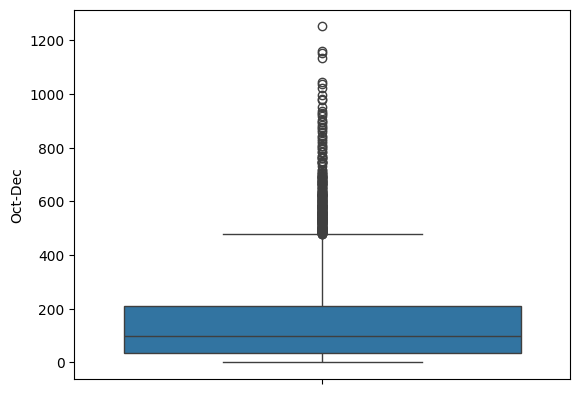

In [ ]:
import seaborn as sns
sns.boxplot(df['Oct-Dec'])

In [ ]:
#outlier removal
out_list = ['MAY','JUN','JUL']

for i in out_list:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3-Q1

  df = df[(df[i]>=Q1-1.5*IQR) & (df[i]<=Q3+1.5*IQR)]

In [ ]:
import matplotlib.pyplot as plt

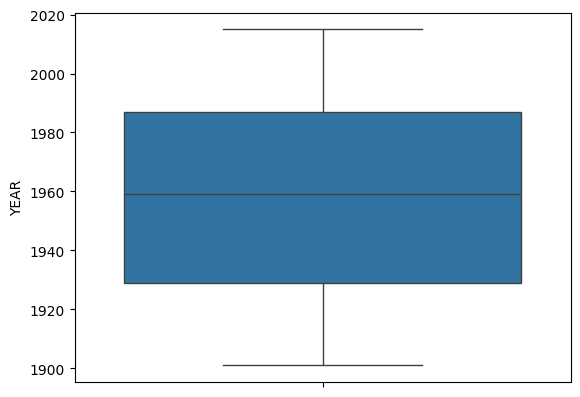

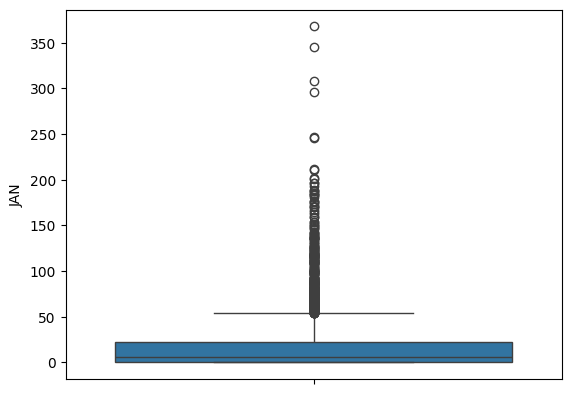

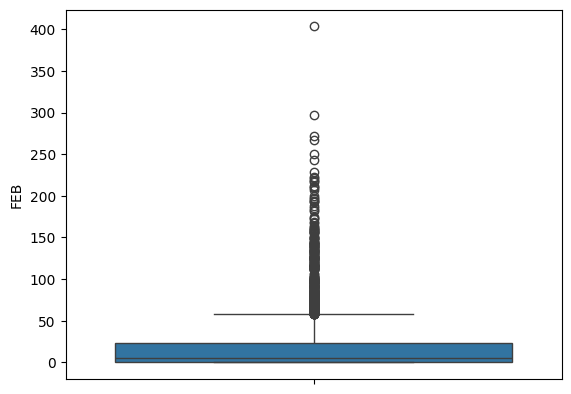

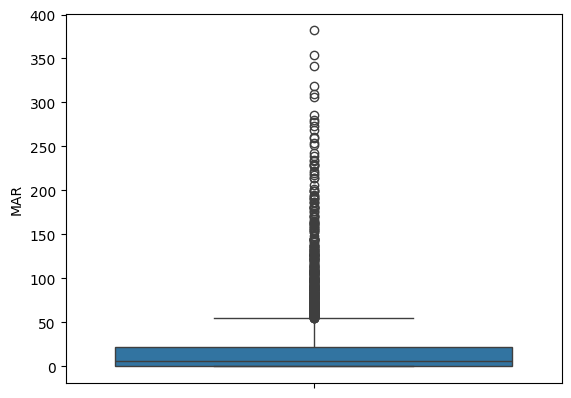

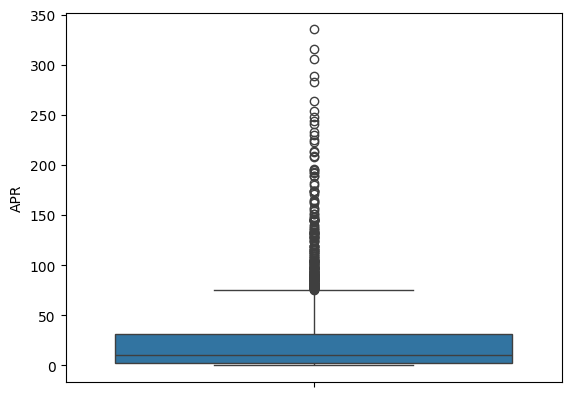

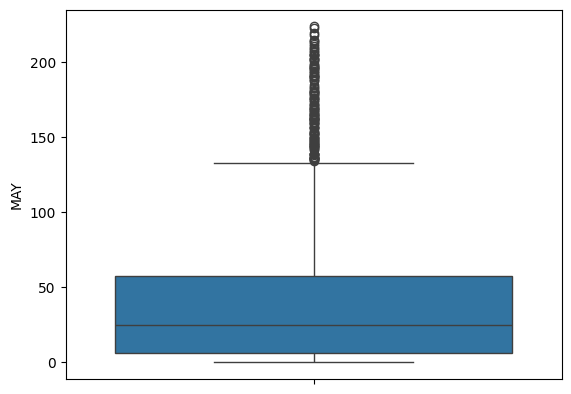

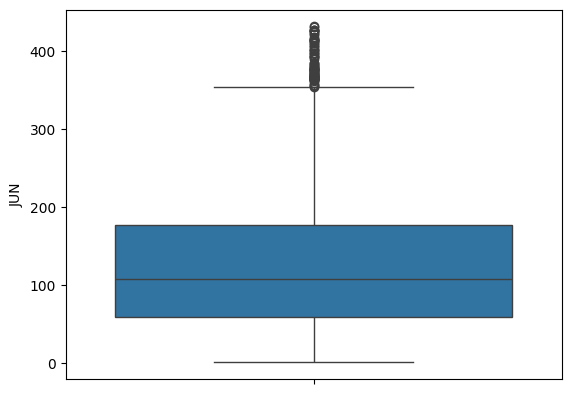

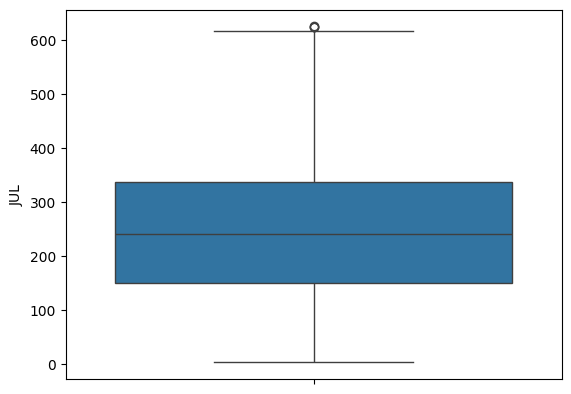

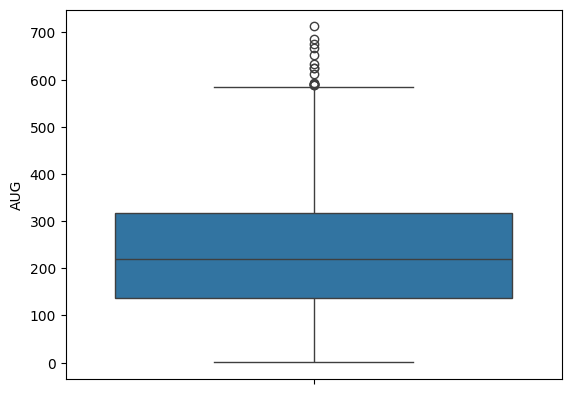

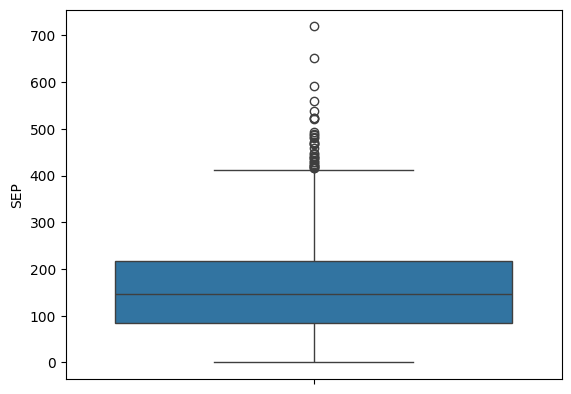

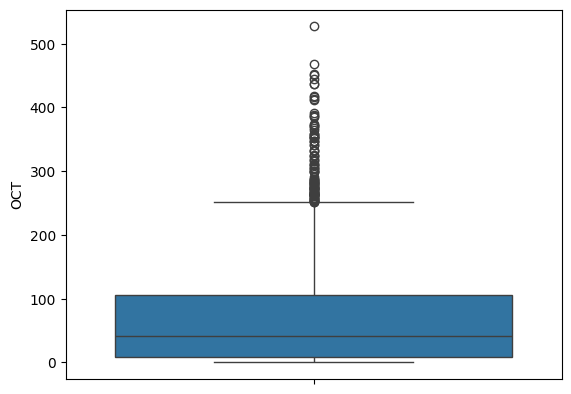

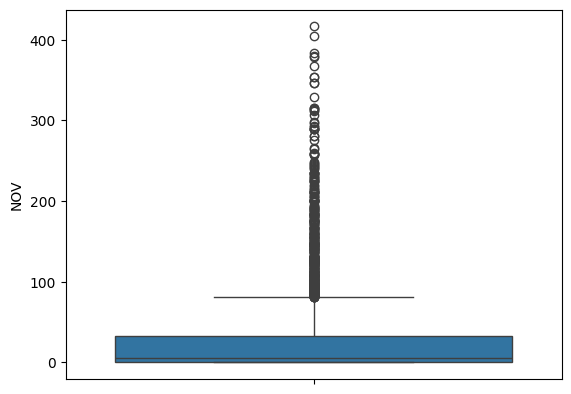

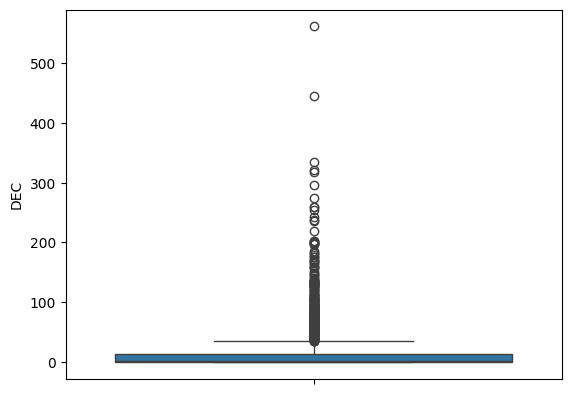

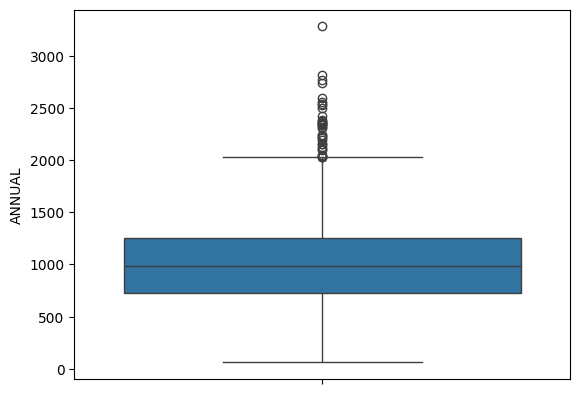

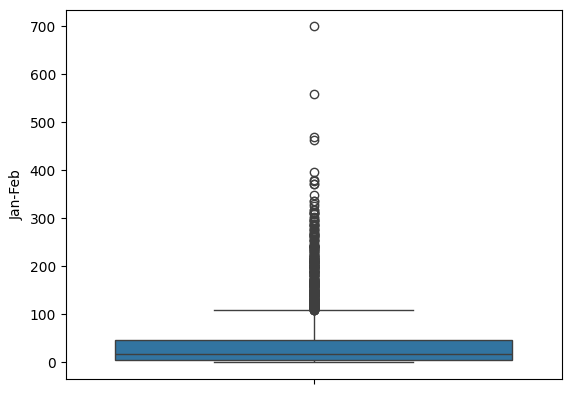

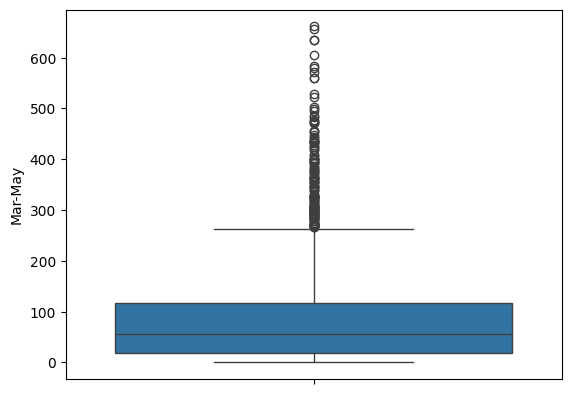

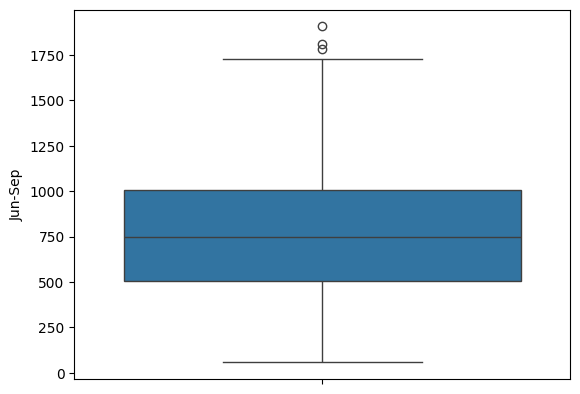

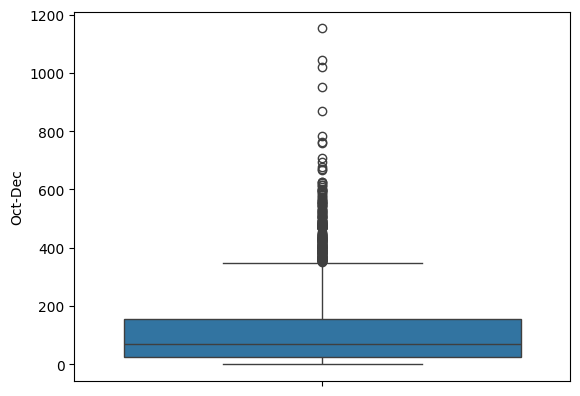

In [ ]:
#outliers detection

for col in df.columns:
  if ((df[col].dtype == "int64") or (df[col].dtype == "float64")):
    sns.boxplot(df[col])
    plt.show()

In [ ]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [ ]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
13,1915,45.0,56.7,33.3,40.9,170.2,334.7,269.0,317.2,429.8,468.1,258.4,318.0,2741.3,101.7,244.4,1350.7,1044.5
24,1926,122.1,0.0,0.0,0.5,198.4,370.0,195.3,523.7,719.3,443.8,148.4,560.7,3282.2,122.1,198.9,1808.3,1152.9
29,1931,25.3,0.0,2.5,2.5,205.4,393.5,289.3,571.0,294.4,368.3,22.8,182.7,2357.7,25.3,210.4,1548.2,573.8
73,1979,35.5,9.4,3.9,64.8,146.3,282.8,455.9,173.6,330.2,163.5,169.8,13.6,1849.4,44.9,215.0,1242.5,347.0
78,1984,69.4,173.8,26.3,156.6,162.3,424.9,446.4,125.8,283.6,347.1,158.9,445.2,2820.3,243.2,345.2,1280.7,951.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [ ]:
df_cat=df.select_dtypes(include=object)
df_cat

,SUBDIVISION
13,ANDAMAN & NICOBAR ISLANDS
24,ANDAMAN & NICOBAR ISLANDS
29,ANDAMAN & NICOBAR ISLANDS
73,ANDAMAN & NICOBAR ISLANDS
78,ANDAMAN & NICOBAR ISLANDS
...,...
4111,LAKSHADWEEP
4112,LAKSHADWEEP
4113,LAKSHADWEEP
4114,LAKSHADWEEP


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
a=mn.fit_transform(df_num)
df_num_mn=pd.DataFrame(a,columns=df_num.columns)
df_num_mn

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0.122807,0.122349,0.140520,0.087173,0.121980,0.760500,0.775998,0.427586,0.444413,0.597469,0.887898,0.620110,0.567148,0.832013,0.145390,0.369296,0.699270,0.905976
1,0.219298,0.331974,0.000000,0.000000,0.001491,0.886506,0.857939,0.309383,0.734278,1.000000,0.841806,0.356132,1.000000,1.000000,0.174553,0.300544,0.946688,1.000000
2,0.263158,0.068787,0.000000,0.006545,0.007456,0.917784,0.912488,0.460144,0.800674,0.409205,0.698596,0.054716,0.325843,0.712879,0.036169,0.317921,0.806056,0.497701
3,0.684211,0.096520,0.023296,0.010209,0.193260,0.653709,0.655525,0.727346,0.242841,0.458982,0.310129,0.407487,0.024255,0.555017,0.064189,0.324872,0.640768,0.300980
4,0.728070,0.188690,0.430731,0.068848,0.467044,0.725201,0.985376,0.712109,0.175744,0.394188,0.658384,0.381329,0.794007,0.856548,0.347677,0.521608,0.661422,0.825050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,0.964912,0.013866,0.006939,0.008115,0.256188,0.478999,0.355617,0.557819,0.355699,0.354700,0.222686,0.442285,0.026574,0.456971,0.011294,0.296464,0.516680,0.274612
3185,0.973684,0.052202,0.000248,0.004188,0.229049,0.094727,0.758124,0.367442,0.534250,0.249861,0.276745,0.029758,0.015695,0.417156,0.027591,0.150499,0.574263,0.144939
3186,0.982456,0.071234,0.085254,0.098168,0.015807,0.394549,0.988394,0.471532,0.215890,0.250139,0.138088,0.187425,0.047619,0.423616,0.086633,0.198096,0.540470,0.154046
3187,0.991228,0.144644,0.039901,0.011518,0.044438,0.256479,0.565692,0.182358,0.653425,0.183676,0.320941,0.141589,0.111111,0.413895,0.099071,0.115896,0.487213,0.251973


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat['SUBDIVISION']=le.fit_transform(df_cat['SUBDIVISION'])
df_cat

,SUBDIVISION
13,0
24,0
29,0
73,0
78,0
...,...
4111,16
4112,16
4113,16
4114,16


In [ ]:
df_pred=pd.concat([df_cat,df_num_mn],axis=1)
df_pred

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
13,0.0,0.877193,0.144372,0.165056,0.353141,0.685655,0.873995,0.642526,0.481476,0.392055,0.400445,0.329666,0.046316,0.026574,0.612969,0.171122,0.846933,0.589565,0.180415
24,0.0,0.131579,0.035889,0.043371,0.097644,0.633761,0.588919,0.843547,0.784282,0.587732,0.540044,0.791920,0.131989,0.012663,0.774154,0.043888,0.576609,0.868181,0.415994
29,0.0,0.517544,0.000000,0.015118,0.065183,0.101998,0.865952,0.942433,0.597434,0.401460,0.355256,0.314681,0.123110,0.000535,0.539644,0.008721,0.381989,0.684563,0.188655
73,0.0,0.289474,0.014954,0.048575,0.001571,0.118998,0.261841,0.463324,0.331355,0.377597,0.273915,0.161229,0.035757,0.031746,0.327681,0.035883,0.149592,0.442390,0.102090
78,0.0,0.342105,0.000272,0.075093,0.271990,0.054578,0.441912,0.505339,0.374980,0.538602,0.277392,0.111722,0.017519,0.004994,0.402559,0.043317,0.334089,0.530251,0.059762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,NaN,0.587719,0.000000,0.019827,0.022251,0.141664,0.320822,0.279016,0.451804,0.174200,0.291435,0.188354,0.056156,0.006064,0.291531,0.011437,0.193110,0.368640,0.109290
3136,NaN,0.342105,0.040239,0.000991,0.000000,0.057262,0.274352,0.678041,0.424699,0.338855,0.050473,0.450873,0.466283,0.072766,0.417528,0.021730,0.121789,0.422114,0.410096
3150,NaN,0.570175,0.057912,0.000496,0.016230,0.013123,0.155943,0.873491,0.672815,0.222207,0.313265,0.504742,0.379170,0.120385,0.521507,0.030736,0.068752,0.608543,0.426403
3171,NaN,0.815789,0.033714,0.165056,0.091099,0.264837,0.352547,0.837279,0.381395,0.307552,0.105812,0.404970,0.368850,0.002140,0.461132,0.112938,0.305984,0.454069,0.319542


In [ ]:
df_pred.fillna(11)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
13,0.0,0.877193,0.144372,0.165056,0.353141,0.685655,0.873995,0.642526,0.481476,0.392055,0.400445,0.329666,0.046316,0.026574,0.612969,0.171122,0.846933,0.589565,0.180415
24,0.0,0.131579,0.035889,0.043371,0.097644,0.633761,0.588919,0.843547,0.784282,0.587732,0.540044,0.791920,0.131989,0.012663,0.774154,0.043888,0.576609,0.868181,0.415994
29,0.0,0.517544,0.000000,0.015118,0.065183,0.101998,0.865952,0.942433,0.597434,0.401460,0.355256,0.314681,0.123110,0.000535,0.539644,0.008721,0.381989,0.684563,0.188655
73,0.0,0.289474,0.014954,0.048575,0.001571,0.118998,0.261841,0.463324,0.331355,0.377597,0.273915,0.161229,0.035757,0.031746,0.327681,0.035883,0.149592,0.442390,0.102090
78,0.0,0.342105,0.000272,0.075093,0.271990,0.054578,0.441912,0.505339,0.374980,0.538602,0.277392,0.111722,0.017519,0.004994,0.402559,0.043317,0.334089,0.530251,0.059762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,11.0,0.587719,0.000000,0.019827,0.022251,0.141664,0.320822,0.279016,0.451804,0.174200,0.291435,0.188354,0.056156,0.006064,0.291531,0.011437,0.193110,0.368640,0.109290
3136,11.0,0.342105,0.040239,0.000991,0.000000,0.057262,0.274352,0.678041,0.424699,0.338855,0.050473,0.450873,0.466283,0.072766,0.417528,0.021730,0.121789,0.422114,0.410096
3150,11.0,0.570175,0.057912,0.000496,0.016230,0.013123,0.155943,0.873491,0.672815,0.222207,0.313265,0.504742,0.379170,0.120385,0.521507,0.030736,0.068752,0.608543,0.426403
3171,11.0,0.815789,0.033714,0.165056,0.091099,0.264837,0.352547,0.837279,0.381395,0.307552,0.105812,0.404970,0.368850,0.002140,0.461132,0.112938,0.305984,0.454069,0.319542


In [ ]:
x=df_pred.iloc[:,:-1]
x

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep
13,0.0,0.877193,0.144372,0.165056,0.353141,0.685655,0.873995,0.642526,0.481476,0.392055,0.400445,0.329666,0.046316,0.026574,0.612969,0.171122,0.846933,0.589565
24,0.0,0.131579,0.035889,0.043371,0.097644,0.633761,0.588919,0.843547,0.784282,0.587732,0.540044,0.791920,0.131989,0.012663,0.774154,0.043888,0.576609,0.868181
29,0.0,0.517544,0.000000,0.015118,0.065183,0.101998,0.865952,0.942433,0.597434,0.401460,0.355256,0.314681,0.123110,0.000535,0.539644,0.008721,0.381989,0.684563
73,0.0,0.289474,0.014954,0.048575,0.001571,0.118998,0.261841,0.463324,0.331355,0.377597,0.273915,0.161229,0.035757,0.031746,0.327681,0.035883,0.149592,0.442390
78,0.0,0.342105,0.000272,0.075093,0.271990,0.054578,0.441912,0.505339,0.374980,0.538602,0.277392,0.111722,0.017519,0.004994,0.402559,0.043317,0.334089,0.530251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,11.0,0.587719,0.000000,0.019827,0.022251,0.141664,0.320822,0.279016,0.451804,0.174200,0.291435,0.188354,0.056156,0.006064,0.291531,0.011437,0.193110,0.368640
3136,11.0,0.342105,0.040239,0.000991,0.000000,0.057262,0.274352,0.678041,0.424699,0.338855,0.050473,0.450873,0.466283,0.072766,0.417528,0.021730,0.121789,0.422114
3150,11.0,0.570175,0.057912,0.000496,0.016230,0.013123,0.155943,0.873491,0.672815,0.222207,0.313265,0.504742,0.379170,0.120385,0.521507,0.030736,0.068752,0.608543
3171,11.0,0.815789,0.033714,0.165056,0.091099,0.264837,0.352547,0.837279,0.381395,0.307552,0.105812,0.404970,0.368850,0.002140,0.461132,0.112938,0.305984,0.454069


In [ ]:
y=df_pred.iloc[:,-1]
y

,Oct-Dec
13,0.180415
24,0.415994
29,0.188655
73,0.102090
78,0.059762
...,...
3067,0.109290
3136,0.410096
3150,0.426403
3171,0.319542


In [ ]:
df_pred = df_pred.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_test.sort_index(ascending=True,inplace=True)
y_test.sort_index(ascending=True,inplace=True)
x_train.sort_index(ascending=True,inplace=True)
y_train.sort_index(ascending=True,inplace=True)

DECISION TREE REGRESSOR

In [ ]:
df_pred = df_pred.dropna(subset=[df_pred.columns[-1]])

x = df_pred.iloc[:, 1:5]
y = df_pred.iloc[:, -1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion='squared_error', max_depth=5, min_samples_split=2, min_samples_leaf=1)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_pred1=dtree.predict(x_test)
y_pred1

array([ 0.04696409,  0.40636655,  0.07640136,  0.09087098, 11.        ,
        0.07640136,  0.09745039,  0.07640136,  0.12177986,  0.12177986,
        0.12177986, 11.        ,  0.07640136,  0.07640136,  0.09745039,
        0.12177986,  0.12177986,  0.12177986,  0.07640136, 11.        ,
        0.06643279,  0.09087098,  0.10077586,  0.09087098,  0.10077586,
       11.        ,  0.07640136,  0.12177986,  0.12177986, 11.        ,
        0.07640136, 11.        , 11.        , 11.        ,  0.07640136,
        0.10077586,  0.12177986,  0.12177986, 11.        ,  0.10077586,
        0.09745039,  0.09087098,  0.07640136,  0.09745039,  0.07640136,
        0.12177986, 11.        ,  0.12177986,  0.06643279, 11.        ,
        0.12177986,  0.04696409, 11.        ,  0.12177986,  0.10077586,
        0.07640136, 11.        ,  0.12177986,  0.12177986,  0.10077586,
        0.12177986,  0.10077586,  0.06643279,  0.07640136,  0.10077586,
        0.09745039,  0.12177986,  0.12177986,  0.12177986,  0.07

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred=y_pred1)

0.011123752887915063

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred=y_pred1)

0.06820816602614167

In [ ]:
#r2
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred1)

0.9993168564052902

RANDOM FOREST REGRESSOR


In [ ]:
from sklearn.ensemble import RandomForestRegressor
classifier=RandomForestRegressor(n_estimators=500,criterion='squared_error')
classifier.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [ ]:
y_pred2=classifier.predict(x_test)
y_pred2

array([ 0.02969391,  0.11286373,  0.08259412,  0.11331321, 11.        ,
        0.205414  ,  0.06480978,  0.08282678,  0.12857282,  0.08429664,
        0.13867465, 11.        ,  0.1402359 ,  0.13491664,  0.16631937,
        0.18371689,  0.04848937,  0.08765773,  0.05866054, 11.        ,
        0.05230185,  0.09022083,  0.0587737 ,  0.15259693,  0.04668297,
       11.        ,  0.13569989,  0.22619724,  0.11421303, 11.        ,
        0.07567555, 11.        , 11.        , 11.        ,  0.15769017,
        0.08480996,  0.17513904,  0.08051418, 11.        ,  0.10563327,
        0.10424304,  0.11800087,  0.01782588,  0.06652008,  0.08974204,
        0.09100113, 11.        ,  0.12685419,  0.12160396, 11.        ,
        0.09751843,  0.02842259, 11.        ,  0.18175991,  0.10204181,
        0.07870969, 11.        ,  0.13347125,  0.11268922,  0.1075245 ,
        0.12026715,  0.1129392 ,  0.05621945,  0.01396652,  0.1003414 ,
        0.07466198,  0.10126655,  0.14786295,  0.1370523 ,  0.02

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred=y_pred2)

0.010188082641748192

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred=y_pred2)

0.065204482496563

In [ ]:
#r2
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred2)

0.9993743187691049

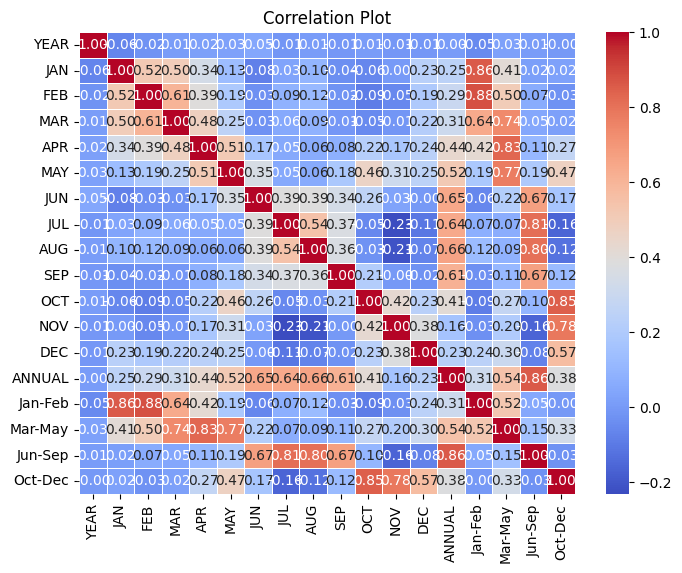

In [ ]:
# Creating a correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

import matplotlib.pyplot as plt
import seaborn as sns

#correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.show()